Created by: Christina Garcia, July 11, 2024

##Add relevant libraries libraries

In [2]:
import pandas as pd
import numpy as np
import os
import datetime
import matplotlib.pyplot as plt
import glob

##Link your drive to environment to fetch data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##1. Collate all data (csv files)

### Initially check data structure

In [ ]:
#check sample csv
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Interns 2024 Sozolab/indonesians/acc/126/user-acc_126_2024-07-10T17:56:50.973+0900_17625.csv') #specify name.csv
df1.head(5)

,126,2024-07-10T17:56:50.968+0900,-0.032,-0.027,9.720
0,126,2024-07-10T17:56:51.166+0900,-0.032,-0.064,9.690
1,126,2024-07-10T17:56:51.364+0900,-0.117,-0.049,9.804
2,126,2024-07-10T17:56:51.571+0900,0.844,0.169,10.332
3,126,2024-07-10T17:56:51.761+0900,0.217,1.774,12.135
4,126,2024-07-10T17:56:51.956+0900,4.932,4.592,7.629


In [ ]:

import pandas as pd
import glob

# Define the path to the folder
folder_path = '/content/drive/MyDrive/Colab Notebooks/Interns 2024 Sozolab/indonesians/acc/126/'

# Use glob to find all CSV files in the folder
csv_files = glob.glob(folder_path + '*.csv')

# Check if there are any CSV files in the folder
if csv_files:
    # Read the first CSV file
    dfs = pd.read_csv(csv_files[0])
    dfs = dfs.loc[:, ~dfs.columns.str.contains('^Unnamed')] # delete generated extra column
    print(dfs.shape)
    print(dfs.head(2))
else:
    print("No CSV files found in the specified folder.")


(203, 5)
   126  2024-07-10T12:10:23.961+0900  0.113  0.100  9.696
0  126  2024-07-10T12:10:24.010+0900  0.137  0.102  9.684
1  126  2024-07-10T12:10:24.077+0900  0.122  0.092  9.694


###Approach 1: small batch per folder, repeat for each user folder and concatenate later per sensor data

In [18]:
#data_path = '/content/drive/MyDrive/Colab Notebooks/Interns 2024 Sozolab/indonesians/acc/126'
#data_path = '/content/drive/MyDrive/Colab Notebooks/Interns 2024 Sozolab/indonesians/acc/127'
data_path = '/content/drive/MyDrive/Colab Notebooks/Interns 2024 Sozolab/indonesians/acc/128'

In [19]:
file_list = os.listdir(data_path)

In [20]:
#Load all the data #
csv_data = []
for csv_file in file_list:
  csv_data.append(pd.read_csv(os.path.join(data_path,csv_file),names=['user_id','timestamp','x', 'y', 'z']))

In [21]:
#Concate all the data
df = csv_data[0]
for i in range(1,len(csv_data)):
  df = pd.concat([df,csv_data[i]])

In [22]:
print(df.shape)
df.head(10)

(194216, 5)


,user_id,timestamp,x,y,z
0,128,2024-07-10T12:09:11.044+0900,0.635,9.339,2.756
1,128,2024-07-10T12:09:11.237+0900,1.116,9.348,2.464
2,128,2024-07-10T12:09:11.438+0900,1.101,9.349,2.763
3,128,2024-07-10T12:09:11.684+0900,1.073,9.309,2.728
4,128,2024-07-10T12:09:11.838+0900,1.119,9.350,2.588
5,128,2024-07-10T12:09:12.030+0900,1.089,9.361,2.388
6,128,2024-07-10T12:09:12.227+0900,0.973,9.466,2.331
7,128,2024-07-10T12:09:12.437+0900,0.940,9.440,2.072
8,128,2024-07-10T12:09:12.636+0900,0.855,9.484,2.223
9,128,2024-07-10T12:09:12.833+0900,0.936,9.501,2.132


In [9]:
df_126 = df
print(df_126)
#df_126.head(3)

     user_id                     timestamp      x      y      z
0        126  2024-07-10T12:10:23.961+0900  0.113  0.100  9.696
1        126  2024-07-10T12:10:24.010+0900  0.137  0.102  9.684
2        126  2024-07-10T12:10:24.077+0900  0.122  0.092  9.694
3        126  2024-07-10T12:10:24.147+0900  0.125  0.119  9.691
4        126  2024-07-10T12:10:24.272+0900  0.128  0.105  9.688
..       ...                           ...    ...    ...    ...
261      126  2024-07-10T17:57:08.805+0900  0.029 -0.080  9.665
262      126  2024-07-10T17:57:08.890+0900  0.039 -0.078  9.660
263      126  2024-07-10T17:57:08.933+0900  0.041 -0.090  9.667
264      126  2024-07-10T17:57:09.006+0900  0.043 -0.090  9.634
265      126  2024-07-10T17:57:09.076+0900  0.048 -0.078  9.655

[129137 rows x 5 columns]


In [17]:
df_127 = df
print(df_127)

     user_id                     timestamp      x      y      z
0        127  2024-07-10T14:47:39.730+0900 -1.352  5.272  7.832
1        127  2024-07-10T14:47:39.941+0900 -2.989  5.376  7.122
2        127  2024-07-10T14:47:40.132+0900 -2.808  6.598  6.768
3        127  2024-07-10T14:47:40.347+0900 -2.406  6.315  8.109
4        127  2024-07-10T14:47:40.540+0900 -1.164  5.080  7.370
..       ...                           ...    ...    ...    ...
104      127  2024-07-10T17:51:05.162+0900 -0.249 -0.004  9.708
105      127  2024-07-10T17:51:05.381+0900 -0.243  0.004  9.713
106      127  2024-07-10T17:51:05.581+0900 -0.246 -0.004  9.712
107      127  2024-07-10T17:51:05.766+0900 -0.240 -0.004  9.711
108      127  2024-07-10T17:51:05.969+0900 -0.243  0.002  9.708

[46782 rows x 5 columns]


In [23]:
df_128 = df
print(df_128)

     user_id                     timestamp      x      y      z
0        128  2024-07-10T12:09:11.044+0900  0.635  9.339  2.756
1        128  2024-07-10T12:09:11.237+0900  1.116  9.348  2.464
2        128  2024-07-10T12:09:11.438+0900  1.101  9.349  2.763
3        128  2024-07-10T12:09:11.684+0900  1.073  9.309  2.728
4        128  2024-07-10T12:09:11.838+0900  1.119  9.350  2.588
..       ...                           ...    ...    ...    ...
100      128  2024-07-10T17:54:18.511+0900  0.014 -0.007  9.741
101      128  2024-07-10T17:54:18.702+0900  0.003 -0.007  9.735
102      128  2024-07-10T17:54:18.903+0900  0.007 -0.003  9.718
103      128  2024-07-10T17:54:19.106+0900  0.009 -0.013  9.714
104      128  2024-07-10T17:54:19.315+0900  0.016  0.002  9.741

[194216 rows x 5 columns]


In [24]:
##Concatenate All
acc = pd.concat([df_126, df_127, df_128])
print(acc.shape)
acc.head(5)

(370135, 5)


,user_id,timestamp,x,y,z
0,126,2024-07-10T12:10:23.961+0900,0.113,0.100,9.696
1,126,2024-07-10T12:10:24.010+0900,0.137,0.102,9.684
2,126,2024-07-10T12:10:24.077+0900,0.122,0.092,9.694
3,126,2024-07-10T12:10:24.147+0900,0.125,0.119,9.691
4,126,2024-07-10T12:10:24.272+0900,0.128,0.105,9.688


##Approach 2: big batch all at once, concatenate all users per sensor data

In [ ]:
# Define the path to your folder
#folder_path = '/content/drive/MyDrive/Colab Notebooks/Interns 2024 Sozolab/indonesians/acc/'

# Library glob to find all CSV files in the folder and subfolders
#csv_files = glob.glob(folder_path + '**/*.csv', recursive=True)

# Create an empty list to hold DataFrames
#dataframes = []

# Loop (scan) through the list of CSV files and read each file
#for file in csv_files:
#    df = pd.read_csv(file)
#    df = df.loc[:, ~df.columns.str.contains('^Unnamed')] # delete generated extra column
#    dataframes.append(df)

# Concatenate all DataFrames into a single DataFrame
#combined_df = pd.concat(dataframes, ignore_index=True)

# Check the file
#print(combined_df.shape) #Check the shape (size)
#print(combined_df.head(2)) #Check the first few rows of the combined DataFrame


(368855, 2538)
     127  2024-07-10T14:47:39.730+0900  -1.352  5.272  7.832  \
0  127.0  2024-07-10T14:47:39.941+0900  -2.989  5.376  7.122   
1  127.0  2024-07-10T14:47:40.132+0900  -2.808  6.598  6.768   

  2024-07-10T14:47:16.719+0900  -2.862  4.488  8.312  \
0                          NaN     NaN    NaN    NaN   
1                          NaN     NaN    NaN    NaN   

  2024-07-10T14:47:19.324+0900  ...  2024-07-10T17:56:30.457+0900  \
0                          NaN  ...                           NaN   
1                          NaN  ...                           NaN   

   2024-07-10T17:52:35.973+0900  2024-07-10T17:55:06.100+0900  \
0                           NaN                           NaN   
1                           NaN                           NaN   

  2024-07-10T17:54:44.914+0900  2024-07-10T17:54:23.326+0900  \
0                          NaN                           NaN   
1                          NaN                           NaN   

   2024-07-10T17:55:27.288

In the resulting shape, we assume more rows but retain 5 columns. But it is not reflecting 5 columns. Hence always checking a sample data prior is recommended

##check data per user

In [ ]:
acc.head(3)

,user_id,timestamp,x,y,z
0,126,2024-07-10T12:10:23.961+0900,0.113,0.100,9.696
1,126,2024-07-10T12:10:24.010+0900,0.137,0.102,9.684
2,126,2024-07-10T12:10:24.077+0900,0.122,0.092,9.694


In [ ]:
print(acc['user_id'].value_counts())
print('\nTotal: {}'.format(len(acc['user_id']))) #370135

user_id
128    194216
126    129137
127     46782
Name: count, dtype: int64

Total: 370135


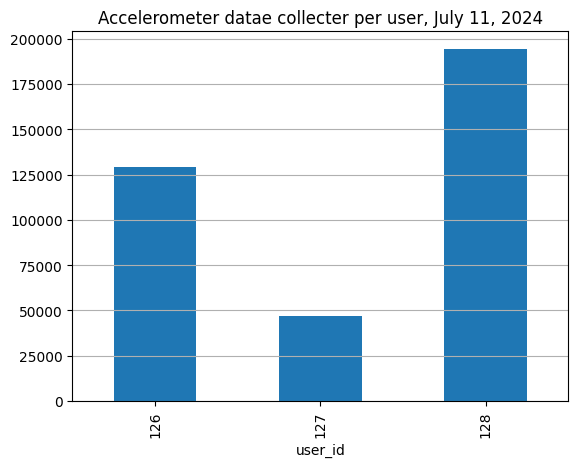

In [ ]:
acc['user_id'].value_counts().sort_index().plot(kind='bar',title='Accelerometer datae collecter per user, July 11, 2024').grid(axis='y');

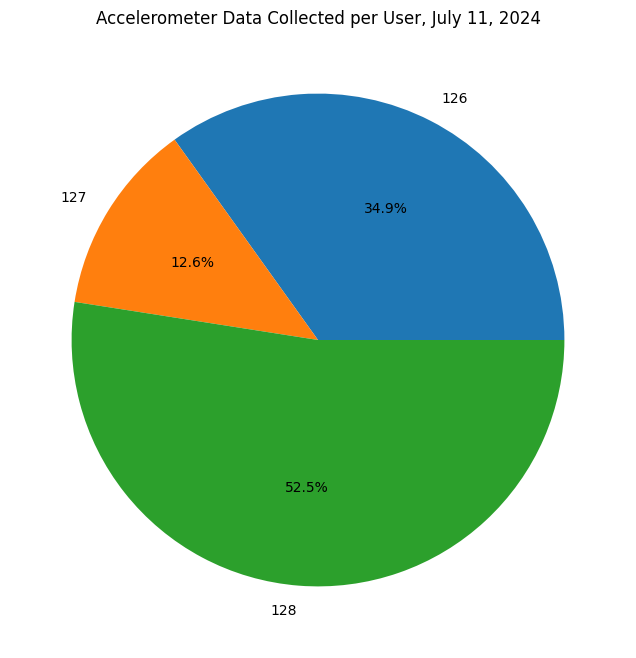

In [26]:
import matplotlib.pyplot as plt

acc['user_id'].value_counts().sort_index().plot(
    kind='pie',
    title='Accelerometer Data Collected per User, July 11, 2024',
    autopct='%1.1f%%',  # Display percentages on the pie chart
    figsize=(8, 8)  # Set the figure size for better readability
)
plt.ylabel('')  # Remove the y-label for a cleaner look
plt.show()


###Visualize accelerometer data

In [ ]:
acc1 = acc.head(10)
acc1.head(5)

,user_id,timestamp,x,y,z
0,126,2024-07-10T12:10:23.961+0900,0.113,0.100,9.696
1,126,2024-07-10T12:10:24.010+0900,0.137,0.102,9.684
2,126,2024-07-10T12:10:24.077+0900,0.122,0.092,9.694
3,126,2024-07-10T12:10:24.147+0900,0.125,0.119,9.691
4,126,2024-07-10T12:10:24.272+0900,0.128,0.105,9.688


   user_id                     timestamp      x      y      z
0      126  2024-07-10T12:10:23.961+0900  0.113  0.100  9.696
1      126  2024-07-10T12:10:24.010+0900  0.137  0.102  9.684
2      126  2024-07-10T12:10:24.077+0900  0.122  0.092  9.694
3      126  2024-07-10T12:10:24.147+0900  0.125  0.119  9.691
4      126  2024-07-10T12:10:24.272+0900  0.128  0.105  9.688


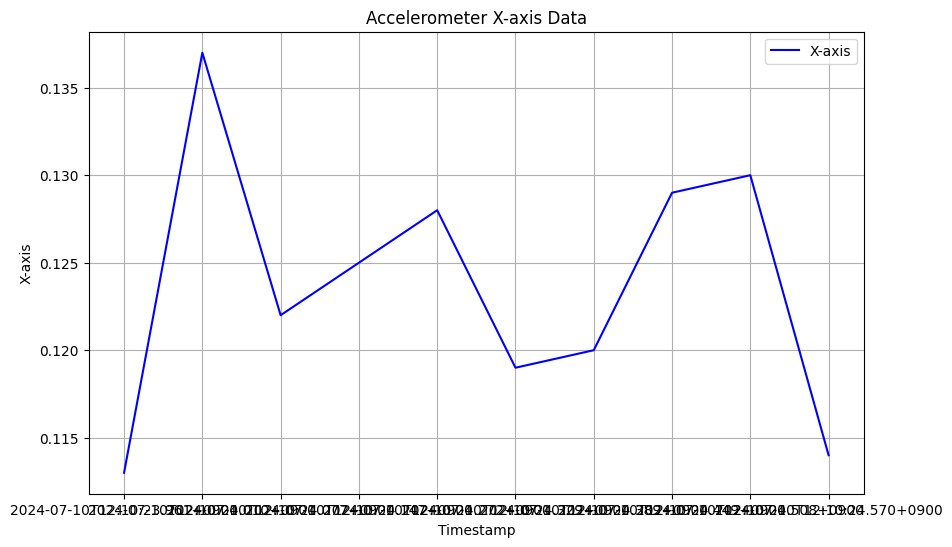

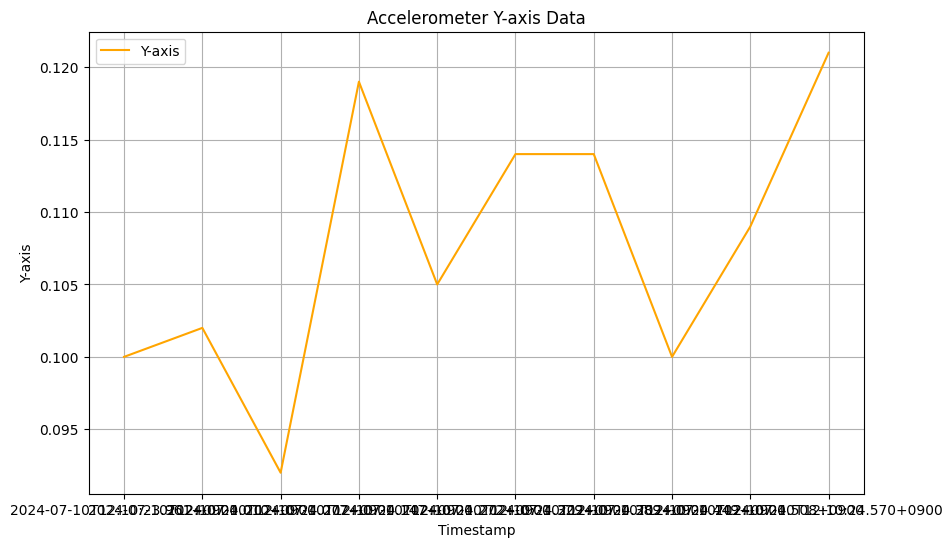

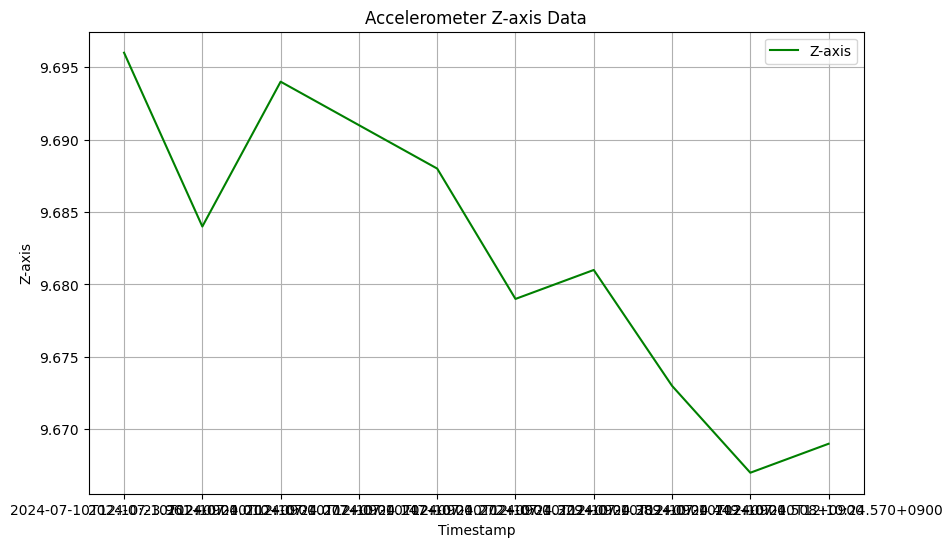

In [ ]:
import matplotlib.pyplot as plt

# Assuming acc1 is your DataFrame
# Display the first 5 rows
print(acc1.head(5))

# List of axis labels
axes = ['x', 'y', 'z']
colors = ['blue', 'orange', 'green']

# Plot each axis
for i, axis in enumerate(axes):
    plt.figure(figsize=(10, 6))
    plt.plot(acc1['timestamp'], acc1[axis], label=f'{axis.upper()}-axis', color=colors[i])
    plt.title(f'Accelerometer {axis.upper()}-axis Data')
    plt.xlabel('Timestamp')
    plt.ylabel(f'{axis.upper()}-axis')
    plt.legend()
    plt.grid(True)
    plt.show()


##Save the collated file

In [ ]:
#acc.to_csv(r'/content/drive/MyDrive/Colab Notebooks/Interns 2024 Sozolab/indonesians/acc.csv')

###Label analysis

In [ ]:
#check report label
label = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Interns 2024 Sozolab/indonesians/records.csv') #specify name.csv
label.head(5)

,id,value,record_type_id,activity_target_id,record_type.name,record_type.form_type,record_type.options,record_type.activity_type_id,activity_type.name,activity_type.activity_type_group_id,...,customer.phone,customer.population,customer.room,customer.doctor,customer.birthdate,customer.start_date,customer.care_level,customer.meal_type,customer.sex,customer.left_at
0,66553,Happy,1498,40275,I-emotion,4,"[[""Sad"",false,""""],[""Happy"",false,""""],[""Normal""...",200,I - Walking,28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,66554,36,1496,40275,I-temperature,0,[],200,I - Walking,28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,66555,45,1497,40275,I-weight,0,[],200,I - Walking,28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,66556,Normal,1498,40276,I-emotion,4,"[[""Sad"",false,""""],[""Happy"",false,""""],[""Normal""...",200,I - Walking,28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,66558,35.5,1496,40278,I-temperature,0,[],200,I - Walking,28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##filter the columns we are concerned about

In [ ]:
#check all columns
label.columns

Index(['id', 'value', 'record_type_id', 'activity_target_id',
       'record_type.name', 'record_type.form_type', 'record_type.options',
       'record_type.activity_type_id', 'activity_type.name',
       'activity_type.activity_type_group_id',
       'activity_type.has_multi_records', 'activity_type.has_target',
       'activity_type.is_instant', 'activity_type_group.name',
       'activity_target.activity_id', 'activity_target.customer_id',
       'activity_target.user_id', 'activity.started_at',
       'activity.finished_at', 'activity.user_id', 'activity.activity_type_id',
       'activity.local_id', 'customer.name', 'customer.email',
       'customer.postcode', 'customer.address', 'customer.phone',
       'customer.population', 'customer.room', 'customer.doctor',
       'customer.birthdate', 'customer.start_date', 'customer.care_level',
       'customer.meal_type', 'customer.sex', 'customer.left_at'],
      dtype='object')

In [ ]:
# Assuming label is your DataFrame
columns_to_keep = ['value', 'record_type_id', 'activity_target_id',
       'record_type.name', 'activity_type.name','activity.activity_type_id',
       'activity_target.user_id', 'activity.started_at',
       'activity.finished_at', 'activity.user_id']

# Method 1: Using filter
lab = label.filter(items=columns_to_keep)

# Method 2: Selecting columns directly
lab = label[columns_to_keep]

# Display the first few rows of the resulting DataFrame
print(lab.head())

    value  record_type_id  activity_target_id record_type.name  \
0   Happy            1498               40275        I-emotion   
1      36            1496               40275    I-temperature   
2      45            1497               40275         I-weight   
3  Normal            1498               40276        I-emotion   
4    35.5            1496               40278    I-temperature   

  activity_type.name  activity.activity_type_id  activity_target.user_id  \
0        I - Walking                        200                      126   
1        I - Walking                        200                      126   
2        I - Walking                        200                      126   
3        I - Walking                        200                      126   
4        I - Walking                        200                      126   

  activity.started_at activity.finished_at  activity.user_id  
0     2024/7/10 12:09      2024/7/10 12:09               126  
1     2024/7/10 12:0

In [ ]:
lab.head(5)

,value,record_type_id,activity_target_id,record_type.name,activity_type.name,activity.activity_type_id,activity_target.user_id,activity.started_at,activity.finished_at,activity.user_id
0,Happy,1498,40275,I-emotion,I - Walking,200,126,2024/7/10 12:09,2024/7/10 12:09,126
1,36,1496,40275,I-temperature,I - Walking,200,126,2024/7/10 12:09,2024/7/10 12:09,126
2,45,1497,40275,I-weight,I - Walking,200,126,2024/7/10 12:09,2024/7/10 12:09,126
3,Normal,1498,40276,I-emotion,I - Walking,200,126,2024/7/10 12:11,2024/7/10 12:11,126
4,35.5,1496,40278,I-temperature,I - Walking,200,126,2024/7/10 12:09,2024/7/10 12:09,127


#rename column to simpler terms

In [ ]:
lab = lab.rename(columns={'activity_type.name': 'activity', 'activity.activity_type_id': 'activity_id', 'record_type_id':'record_id', 'record_type.name':'record', 'activity_target.user_id': 'target_id', 'activity.started_at':'started_at', 'activity.finished_at': 'finished_at', 'activity.user_id':'user_id' })

In [ ]:
lab.head(5)

,value,record_id,activity_target_id,record,activity,activity_id,target_id,started_at,finished_at,user_id
0,Happy,1498,40275,I-emotion,I - Walking,200,126,2024/7/10 12:09,2024/7/10 12:09,126
1,36,1496,40275,I-temperature,I - Walking,200,126,2024/7/10 12:09,2024/7/10 12:09,126
2,45,1497,40275,I-weight,I - Walking,200,126,2024/7/10 12:09,2024/7/10 12:09,126
3,Normal,1498,40276,I-emotion,I - Walking,200,126,2024/7/10 12:11,2024/7/10 12:11,126
4,35.5,1496,40278,I-temperature,I - Walking,200,126,2024/7/10 12:09,2024/7/10 12:09,127


In [ ]:
lab.shape

(57, 10)

##Clean the data, filter no value and undefined timestamp

In [ ]:
#no finish time
lab['finished_at'].isnull().sum()

6

In [ ]:
#no start time
lab['started_at'].isnull().sum()

4

In [ ]:
#no value entered
lab['value'].isnull().sum().sum()

20

In [ ]:
#drop no start
a = lab[pd.notnull(lab['started_at'])]
a.value_counts().sum()

35

In [ ]:
#drop no end time (no duration)
b = a[pd.notnull(a['finished_at'])]
b.value_counts().sum()

35

In [ ]:
#check for any duplicates
b.duplicated().sum()

0

In [ ]:
#drop no value
lb = b[pd.notnull(b['value'])]
lb.value_counts().sum()

35

In [ ]:
#Drop duplicate columns
lab = lb.drop_duplicates()
lab.shape

(35, 10)

##Check unique values per column to filter rows per desired record

In [ ]:
print(lab['record'].value_counts())
print('\nTotal: {}'.format(len(lab['record'])))

record
I-emotion        10
I-temperature     9
I-weight          9
I-diagnosis       7
Name: count, dtype: int64

Total: 35


In [ ]:
import plotly.express as px

In [ ]:
emotion = lab[lab['record'] == 'I-emotion']
weight = lab[lab['record'] == 'I-weight']
temperature = lab[lab['record'] == 'I-temperature']
diagnosis = lab[lab['record'] == 'I-diagnosis']

In [ ]:
px.histogram(data_frame=lab,x='activity',color='target_id',barmode='group',title='Activity Performed by each Participant, July 11, 2024')

In [ ]:
px.histogram(data_frame=lab,x='user_id',color='target_id',barmode='group',title='Participants recorded by each User, July 11, 2024')

In [ ]:
emotion.head()

,value,record_id,activity_target_id,record,activity,activity_id,target_id,started_at,finished_at,user_id
0,Happy,1498,40275,I-emotion,I - Walking,200,126,2024/7/10 12:09,2024/7/10 12:09,126
3,Normal,1498,40276,I-emotion,I - Walking,200,126,2024/7/10 12:11,2024/7/10 12:11,126
6,Normal,1498,40278,I-emotion,I - Walking,200,126,2024/7/10 12:09,2024/7/10 12:09,127
10,Normal,1498,40283,I-emotion,I - Walking,200,128,2024/7/10 12:22,2024/7/10 12:23,128
11,Happy,1498,40341,I-emotion,I - Walking,200,126,2024/7/10 12:21,2024/7/10 12:24,127


In [ ]:
px.histogram(data_frame=emotion,x='activity',color='value',barmode='group',title='Emotion of Participant while doing Activity, July 11, 2024')

In [ ]:
weight.head()

,value,record_id,activity_target_id,record,activity,activity_id,target_id,started_at,finished_at,user_id
2,45,1497,40275,I-weight,I - Walking,200,126,2024/7/10 12:09,2024/7/10 12:09,126
5,50,1497,40278,I-weight,I - Walking,200,126,2024/7/10 12:09,2024/7/10 12:09,127
8,45,1497,40276,I-weight,I - Walking,200,126,2024/7/10 12:11,2024/7/10 12:11,126
37,45,1509,40356,I-weight,I - Checkup,203,126,2024/7/10 15:20,2024/7/10 15:23,128
39,48,1509,40357,I-weight,I - Checkup,203,127,2024/7/10 15:23,2024/7/10 15:26,128


In [ ]:
temperature.head()

,value,record_id,activity_target_id,record,activity,activity_id,target_id,started_at,finished_at,user_id
1,36,1496,40275,I-temperature,I - Walking,200,126,2024/7/10 12:09,2024/7/10 12:09,126
4,35.5,1496,40278,I-temperature,I - Walking,200,126,2024/7/10 12:09,2024/7/10 12:09,127
7,35,1496,40276,I-temperature,I - Walking,200,126,2024/7/10 12:11,2024/7/10 12:11,126
36,37.5,1508,40356,I-temperature,I - Checkup,203,126,2024/7/10 15:20,2024/7/10 15:23,128
38,37.8,1508,40357,I-temperature,I - Checkup,203,127,2024/7/10 15:23,2024/7/10 15:26,128


In [ ]:
diagnosis.head()

,value,record_id,activity_target_id,record,activity,activity_id,target_id,started_at,finished_at,user_id
30,"[""I ate sushi and pudding yummy""]",1507,40353,I-diagnosis,I - Eating,202,127,2024/7/10 14:59,2024/7/10 14:59,127
35,"[""acute cough since 2 days, no history if medi...",1511,40356,I-diagnosis,I - Checkup,203,126,2024/7/10 15:20,2024/7/10 15:23,128
41,"[""persistent headache since 1 month, neasaus a...",1511,40357,I-diagnosis,I - Checkup,203,127,2024/7/10 15:23,2024/7/10 15:26,128
45,"[""You feel tired, coping mechanisms are cry an...",1511,40358,I-diagnosis,I - Checkup,203,127,2024/7/10 15:28,2024/7/10 15:32,126
50,"[""She has a headache, feel bad because Takeru-...",1511,40359,I-diagnosis,I - Checkup,203,128,2024/7/10 15:31,2024/7/10 15:32,126


In [ ]:
print(lab['activity'].value_counts())
print('\nTotal: {}'.format(len(lab['activity'])))

activity
I - Checkup    23
I - Walking    11
I - Eating      1
Name: count, dtype: int64

Total: 35


In [ ]:
lab.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, 0 to 56
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   value               35 non-null     object
 1   record_id           35 non-null     int64 
 2   activity_target_id  35 non-null     int64 
 3   record              35 non-null     object
 4   activity            35 non-null     object
 5   activity_id         35 non-null     int64 
 6   target_id           35 non-null     int64 
 7   started_at          35 non-null     object
 8   finished_at         35 non-null     object
 9   user_id             35 non-null     int64 
dtypes: int64(5), object(5)
memory usage: 3.0+ KB


## Update datetime format before filtering timestamp

In [ ]:
lab["finished_at"] = pd.to_datetime(lab["finished_at"]).dt.tz_localize("Asia/Tokyo").dt.tz_convert(None)
lab["started_at"] = pd.to_datetime(lab["started_at"]).dt.tz_localize("Asia/Tokyo").dt.tz_convert(None)

In [ ]:
lab.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, 0 to 56
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   value               35 non-null     object        
 1   record_id           35 non-null     int64         
 2   activity_target_id  35 non-null     int64         
 3   record              35 non-null     object        
 4   activity            35 non-null     object        
 5   activity_id         35 non-null     int64         
 6   target_id           35 non-null     int64         
 7   started_at          35 non-null     datetime64[ns]
 8   finished_at         35 non-null     datetime64[ns]
 9   user_id             35 non-null     int64         
dtypes: datetime64[ns](2), int64(5), object(3)
memory usage: 3.0+ KB


##Add duration

In [ ]:
duration =  lab["finished_at"] - lab["started_at"]
duration

0    0 days 00:00:00
1    0 days 00:00:00
2    0 days 00:00:00
3    0 days 00:00:00
4    0 days 00:00:00
5    0 days 00:00:00
6    0 days 00:00:00
7    0 days 00:00:00
8    0 days 00:00:00
10   0 days 00:01:00
11   0 days 00:03:00
30   0 days 00:00:00
34   0 days 00:03:00
35   0 days 00:03:00
36   0 days 00:03:00
37   0 days 00:03:00
38   0 days 00:03:00
39   0 days 00:03:00
40   0 days 00:03:00
41   0 days 00:03:00
42   0 days 00:04:00
43   0 days 00:04:00
44   0 days 00:04:00
45   0 days 00:04:00
46   0 days 00:01:00
47   0 days 00:01:00
48   0 days 00:01:00
49   0 days 00:01:00
50   0 days 00:01:00
51   0 days 00:01:00
52   0 days 00:01:00
53   0 days 00:01:00
54   0 days 00:01:00
55   0 days 00:01:00
56   0 days 00:01:00
dtype: timedelta64[ns]

In [ ]:
#display duration in minutes
duration_s = duration.dt.total_seconds()
#duration_min = duration_s/60
#duration_min

In [ ]:
#make duration column
lab["duration"] = duration_s

In [ ]:
lab = lab.sort_values(by=['duration'])

lab.tail(4)  #check short duration

,value,record_id,activity_target_id,record,activity,activity_id,target_id,started_at,finished_at,user_id,duration,duration_min
43,48,1509,40358,I-weight,I - Checkup,203,127,2024-07-10 06:28:00,2024-07-10 06:32:00,126,240.0,4.0
44,Sad,1510,40358,I-emotion,I - Checkup,203,127,2024-07-10 06:28:00,2024-07-10 06:32:00,126,240.0,4.0
42,37.5,1508,40358,I-temperature,I - Checkup,203,127,2024-07-10 06:28:00,2024-07-10 06:32:00,126,240.0,4.0
45,"[""You feel tired, coping mechanisms are cry an...",1511,40358,I-diagnosis,I - Checkup,203,127,2024-07-10 06:28:00,2024-07-10 06:32:00,126,240.0,4.0


##Save the cleaned labels

In [ ]:
#lab.to_csv(r'/content/drive/MyDrive/Colab Notebooks/Interns 2024 Sozolab/indonesians/label.csv')